In [8]:
import os
import json

def generate_train_data_json(root_dir, output_json):
    train_data = []
    root_dir = os.path.abspath(root_dir)
    # train_folder = os.path.join(root_dir, "Train")
    train_folder = os.path.join(root_dir, "Val")

    # Iterate through characters in the Train folder
    for character_folder in os.listdir(train_folder):
        character_path = os.path.join(train_folder, character_folder)
        if not os.path.isdir(character_path):
            continue
        
        motions_path = os.path.join(character_path, "motions")
        if not os.path.exists(motions_path):
            continue
        
        # Iterate through motions
        for motion_folder in os.listdir(motions_path):
            motion_path = os.path.join(motions_path, motion_folder)
            if not os.path.isdir(motion_path):
                continue
            
            ground_truth_path = os.path.join(motion_path, "ground_truth")
            poses_path = os.path.join(motion_path, "poses")
            reference_image_path = os.path.join(motion_path, "reference.png")
            
            if not os.path.exists(ground_truth_path) or not os.path.exists(poses_path):
                continue
            
            ground_truth_images = sorted(
                [f for f in os.listdir(ground_truth_path) if f.endswith(".png")]
            )
            poses_images = sorted(
                [f for f in os.listdir(poses_path) if f.endswith(".png")]
            )
            
            # Ensure ground_truth and poses images align
            if len(ground_truth_images) != len(poses_images):
                continue
            
            if os.path.exists(reference_image_path):
                # Case 1: reference.png exists
                for i, (gt_img, pose_img) in enumerate(zip(ground_truth_images, poses_images)):
                    train_data.append({
                        "reference_image": os.path.relpath(reference_image_path, root_dir),
                        "pose_image": os.path.relpath(os.path.join(poses_path, pose_img), root_dir),
                        "target_image": os.path.relpath(os.path.join(ground_truth_path, gt_img), root_dir)
                    })
            else:
                # Case 2: No reference.png, use first ground_truth as reference
                if ground_truth_images:
                    default_reference_image = os.path.join(ground_truth_path, ground_truth_images[0])
                    for i in range(1, len(ground_truth_images)):
                        train_data.append({
                            "reference_image": os.path.relpath(default_reference_image, root_dir),
                            "pose_image": os.path.relpath(os.path.join(poses_path, poses_images[i]), root_dir),
                            "target_image": os.path.relpath(os.path.join(ground_truth_path, ground_truth_images[i]), root_dir)
                        })

    # Write to JSON file
    with open(output_json, "w") as f:
        json.dump(train_data, f, indent=4)

# Parameters
root_directory = "/home/ubuntu/IP-Adapter/data"
# output_json_path = os.path.join(root_directory, "train_data.json")
output_json_path = os.path.join(root_directory, "val_data.json")

# Generate train_data.json
generate_train_data_json(root_directory, output_json_path)


Sample 1:


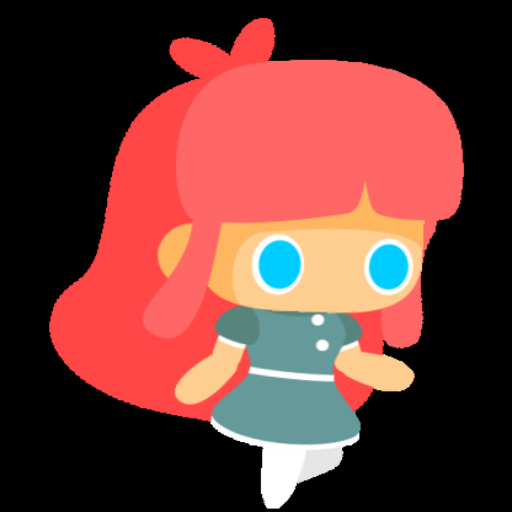

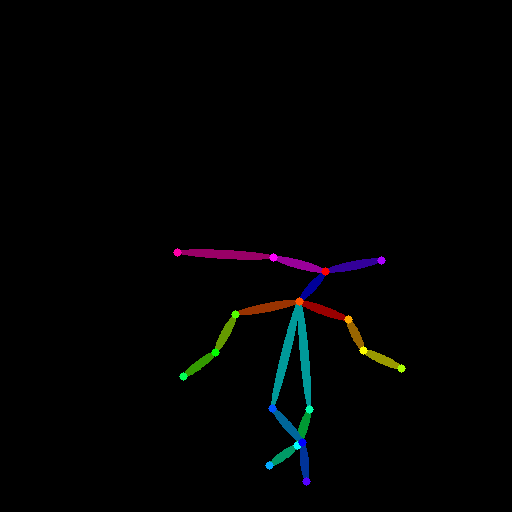

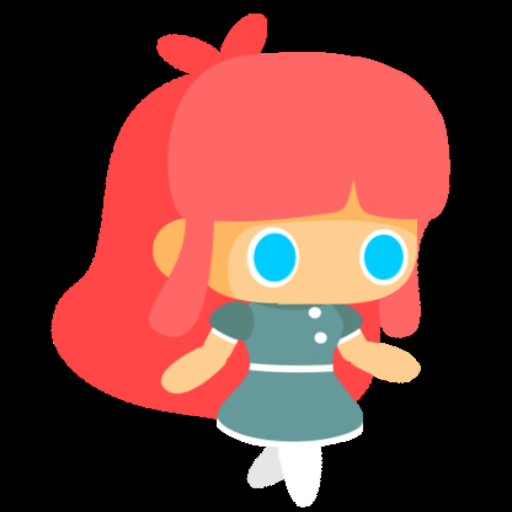

Reference: Val/cute_girl/motions/Walk/ground_truth/frame_1.png, Pose: Val/cute_girl/motions/Walk/poses/humanpose_19.png, Target: Val/cute_girl/motions/Walk/ground_truth/frame_19.png
Sample 2:


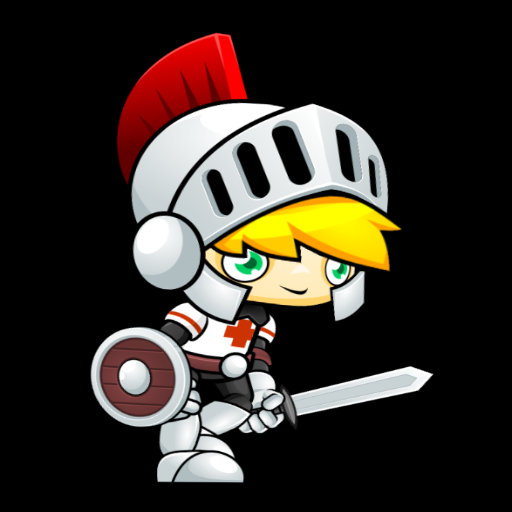

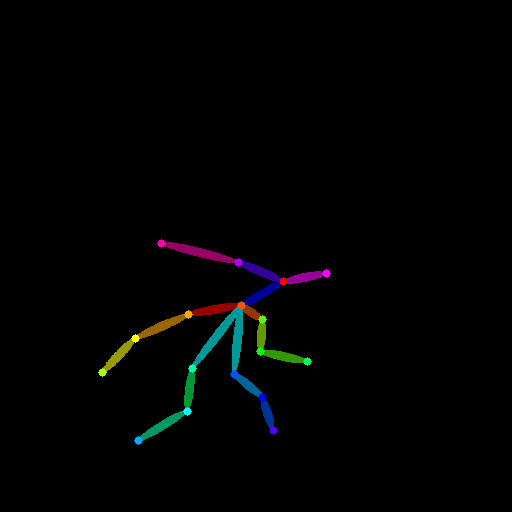

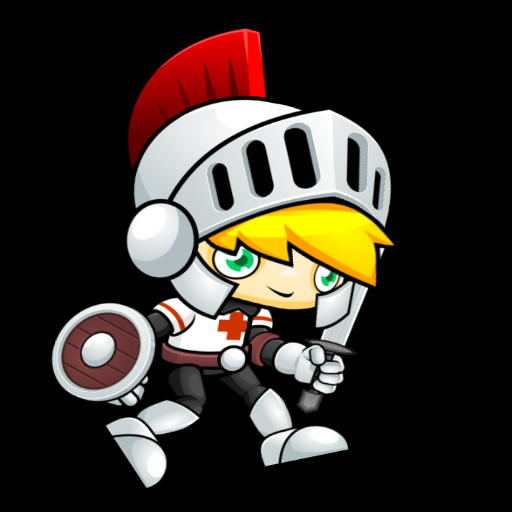

Reference: Val/freeknight_finished/motions/Jump/ground_truth/frame_1.png, Pose: Val/freeknight_finished/motions/Jump/poses/humanpose_9.png, Target: Val/freeknight_finished/motions/Jump/ground_truth/frame_9.png
Sample 3:


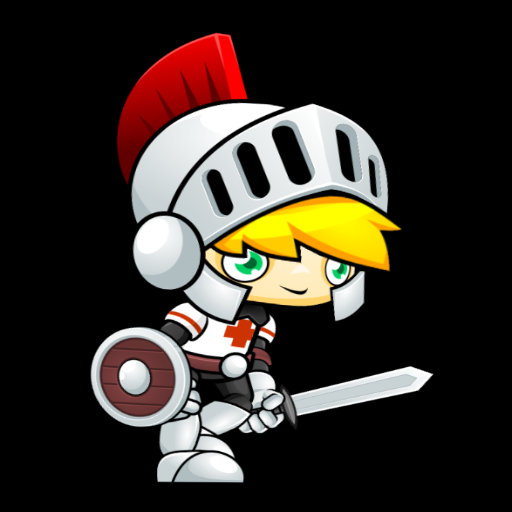

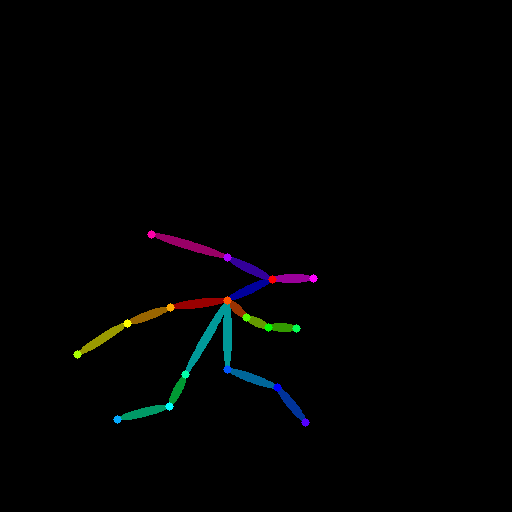

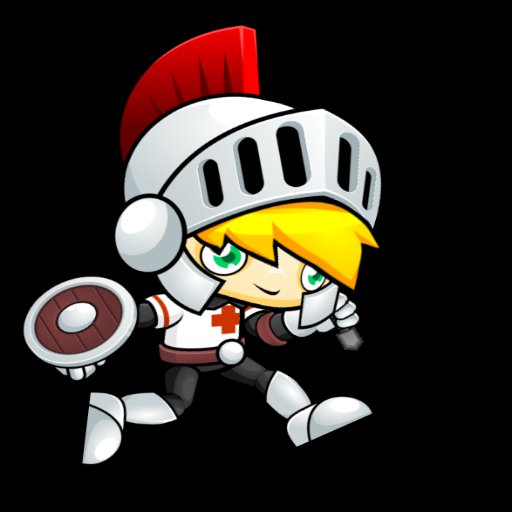

Reference: Val/freeknight_finished/motions/Jump/ground_truth/frame_1.png, Pose: Val/freeknight_finished/motions/Jump/poses/humanpose_7.png, Target: Val/freeknight_finished/motions/Jump/ground_truth/frame_7.png
Sample 4:


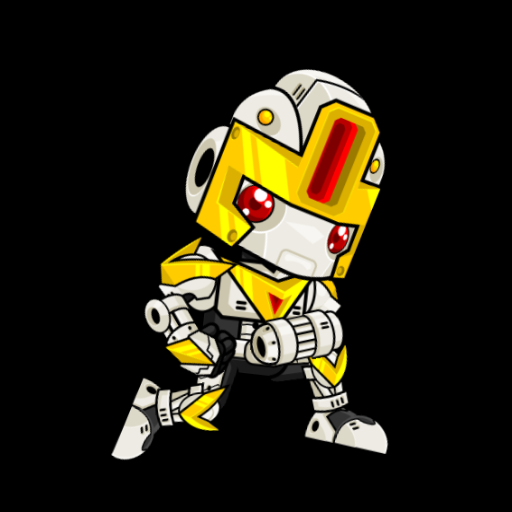

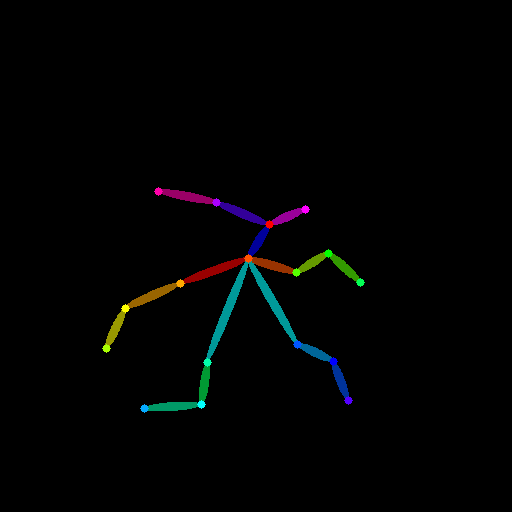

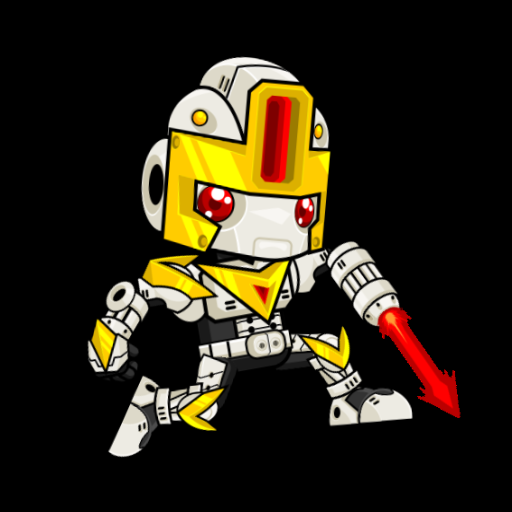

Reference: Val/robot/motions/JumpMelee/ground_truth/frame_1.png, Pose: Val/robot/motions/JumpMelee/poses/humanpose_3.png, Target: Val/robot/motions/JumpMelee/ground_truth/frame_3.png
Sample 5:


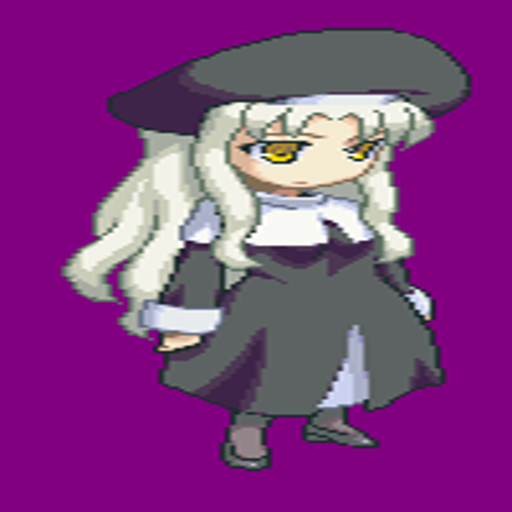

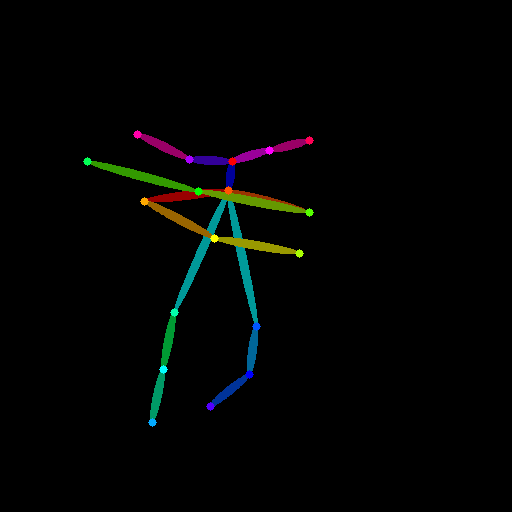

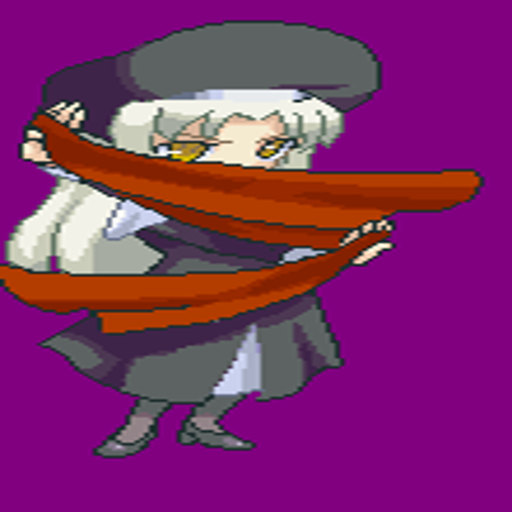

Reference: Val/CarenOrtensia_hand/motions/squat/reference.png, Pose: Val/CarenOrtensia_hand/motions/squat/poses/humanpose_3.png, Target: Val/CarenOrtensia_hand/motions/squat/ground_truth/frame_3.png
Sample 6:


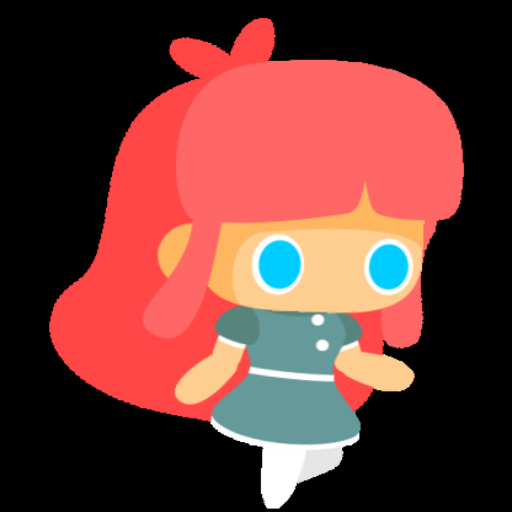

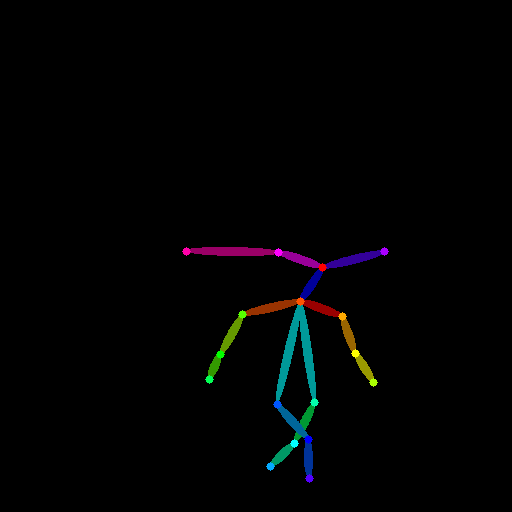

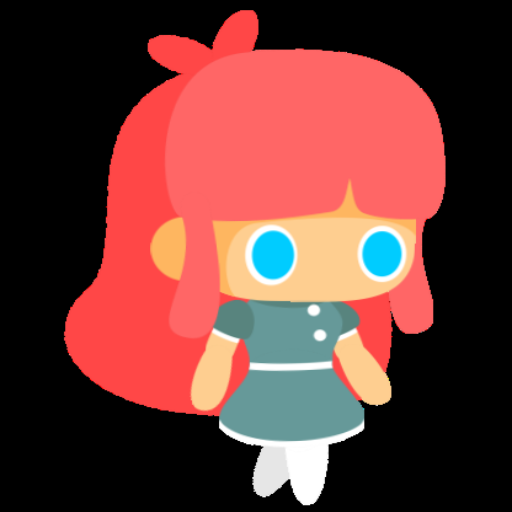

Reference: Val/cute_girl/motions/Walk/ground_truth/frame_1.png, Pose: Val/cute_girl/motions/Walk/poses/humanpose_15.png, Target: Val/cute_girl/motions/Walk/ground_truth/frame_15.png
Sample 7:


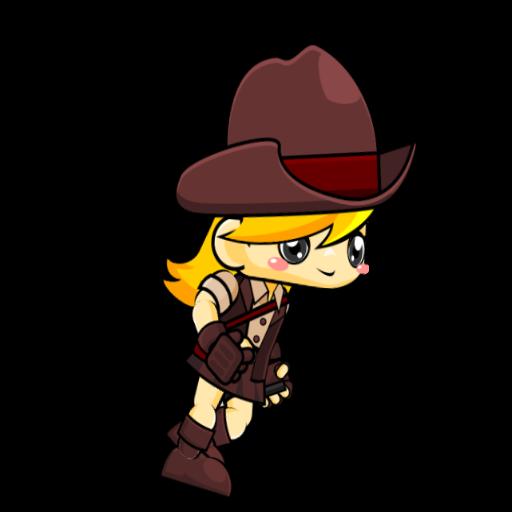

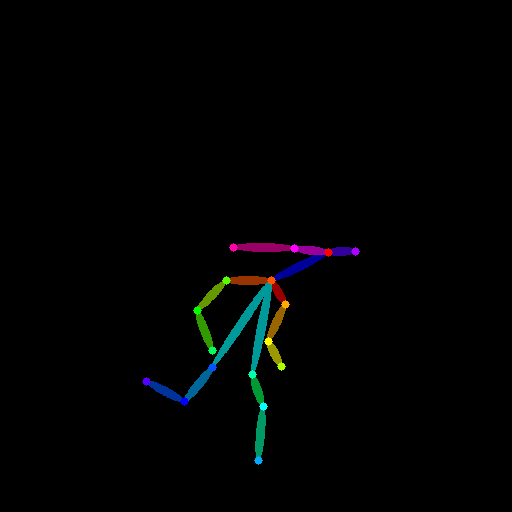

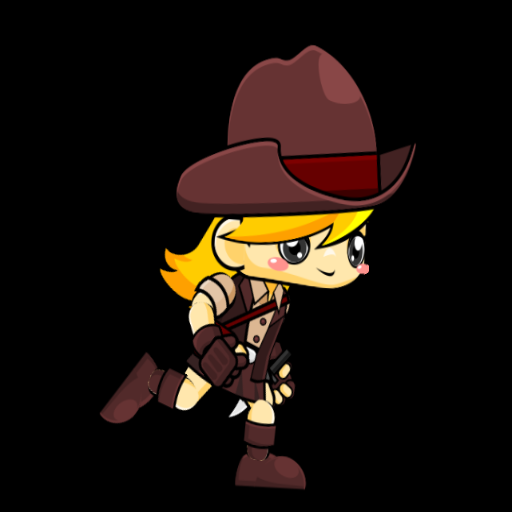

Reference: Val/adventure_girl/motions/run/ground_truth/frame_1.png, Pose: Val/adventure_girl/motions/run/poses/humanpose_4.png, Target: Val/adventure_girl/motions/run/ground_truth/frame_4.png
Sample 8:


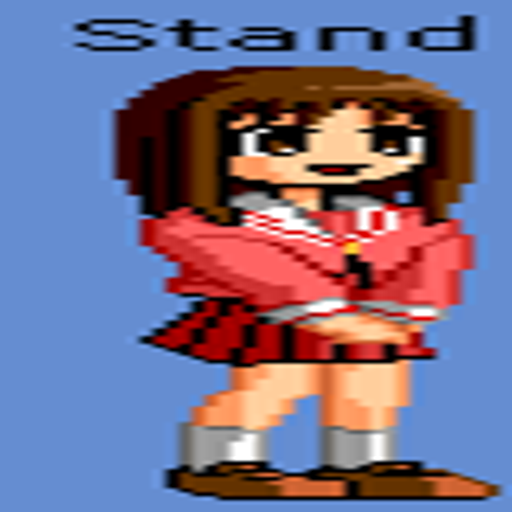

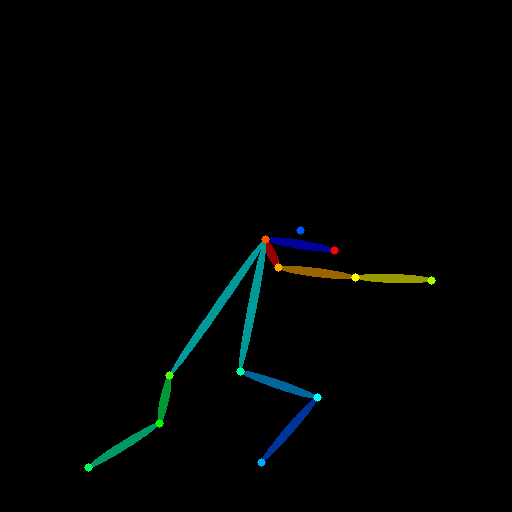

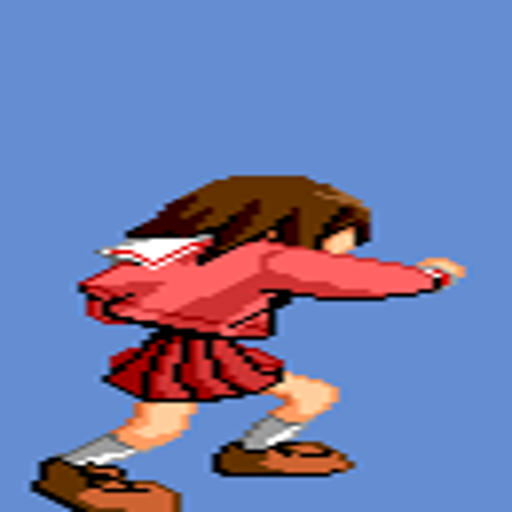

Reference: Val/Osaka_hand/motions/punch/reference.png, Pose: Val/Osaka_hand/motions/punch/poses/humanpose_3.png, Target: Val/Osaka_hand/motions/punch/ground_truth/frame_3.png
Sample 9:


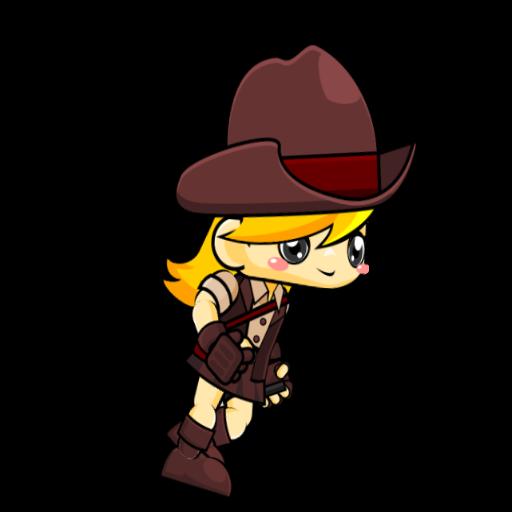

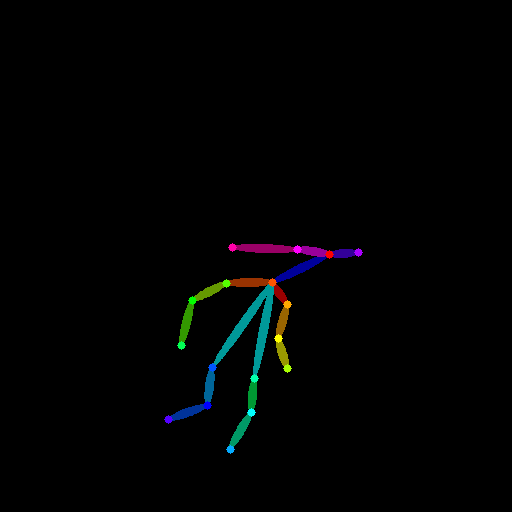

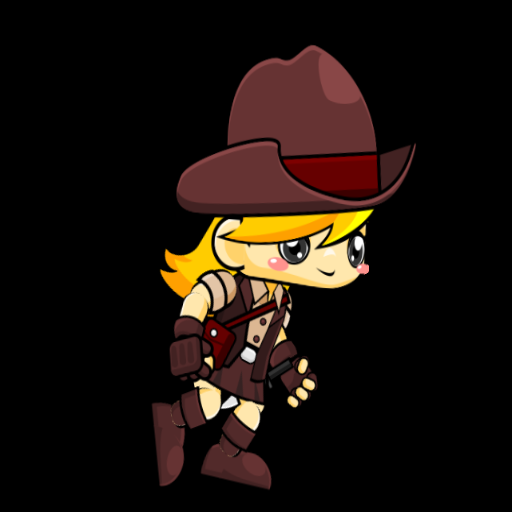

Reference: Val/adventure_girl/motions/run/ground_truth/frame_1.png, Pose: Val/adventure_girl/motions/run/poses/humanpose_5.png, Target: Val/adventure_girl/motions/run/ground_truth/frame_5.png
Sample 10:


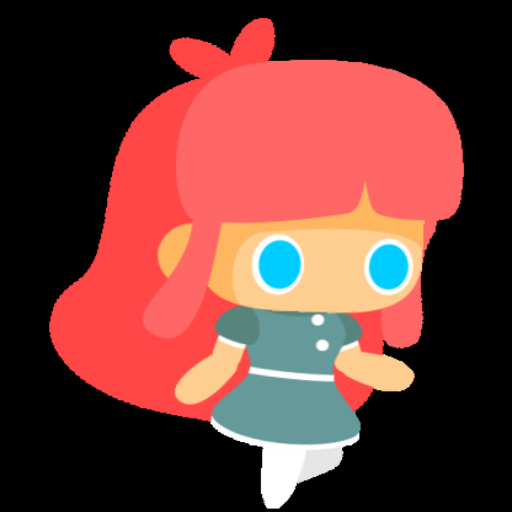

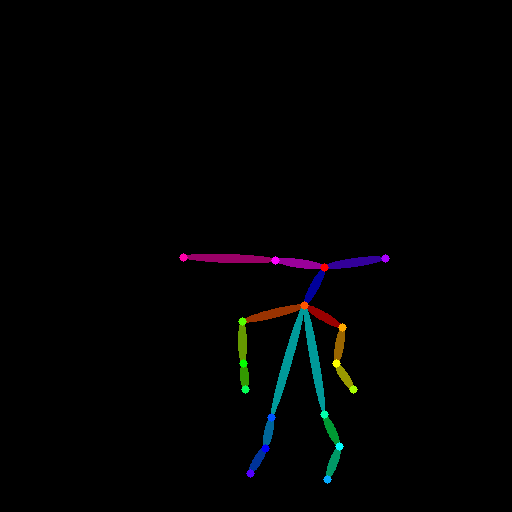

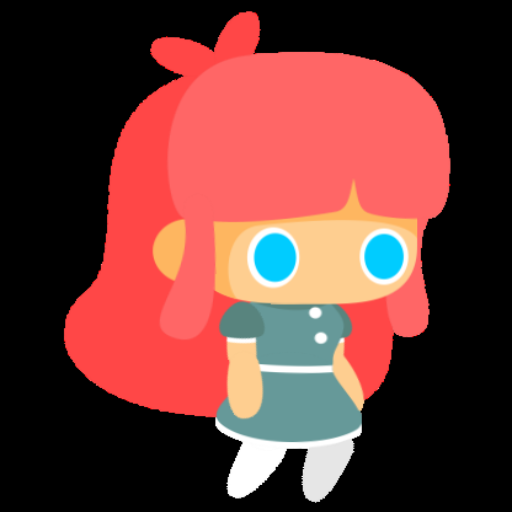

Reference: Val/cute_girl/motions/Walk/ground_truth/frame_1.png, Pose: Val/cute_girl/motions/Walk/poses/humanpose_4.png, Target: Val/cute_girl/motions/Walk/ground_truth/frame_4.png


In [9]:
import random
from PIL import Image

def display_sample_data(json_path, root_dir, sample_size=10):
    # Load the train_data.json file
    with open(json_path, "r") as f:
        train_data = json.load(f)
    
    # Randomly sample `sample_size` data points
    sample_data = random.sample(train_data, min(sample_size, len(train_data)))

    # Display the reference, pose, and target images for each sampled data point
    for idx, data in enumerate(sample_data):
        print(f"Sample {idx + 1}:")
        try:
            # Load and display reference image
            reference_image_path = os.path.join(root_dir, data["reference_image"])
            reference_image = Image.open(reference_image_path)
            reference_image.show(title=f"Reference Image {idx + 1}")

            # Load and display pose image
            pose_image_path = os.path.join(root_dir, data["pose_image"])
            pose_image = Image.open(pose_image_path)
            pose_image.show(title=f"Pose Image {idx + 1}")

            # Load and display target image
            target_image_path = os.path.join(root_dir, data["target_image"])
            target_image = Image.open(target_image_path)
            target_image.show(title=f"Target Image {idx + 1}")

            print(f"Reference: {data['reference_image']}, Pose: {data['pose_image']}, Target: {data['target_image']}")
        except Exception as e:
            print(f"Error loading images for Sample {idx + 1}: {e}")

# Paths
# json_path = "/home/ubuntu/IP-Adapter/data/train_data.json"
json_path = "/home/ubuntu/IP-Adapter/data/val_data.json"
root_directory = "/home/ubuntu/IP-Adapter/data"

# Display 10 samples
display_sample_data(json_path, root_directory, sample_size=10)


In [1]:
import os
import json

def generate_test_data_json(root_dir, output_json, sub_folder):
    test_data = []
    root_dir = os.path.abspath(root_dir)
    test_folder = os.path.join(root_dir, "Test", sub_folder)

    # Iterate through characters in the sub_folder (in_sample or out_sample)
    for character_folder in os.listdir(test_folder):
        character_path = os.path.join(test_folder, character_folder)
        if not os.path.isdir(character_path):
            continue
        
        motions_path = os.path.join(character_path, "motions")
        if not os.path.exists(motions_path):
            continue
        
        # Iterate through motions
        for motion_folder in os.listdir(motions_path):
            motion_path = os.path.join(motions_path, motion_folder)
            if not os.path.isdir(motion_path):
                continue
            
            ground_truth_path = os.path.join(motion_path, "ground_truth")
            poses_path = os.path.join(motion_path, "poses")
            reference_image_path = os.path.join(motion_path, "reference.png")
            
            if not os.path.exists(ground_truth_path) or not os.path.exists(poses_path):
                continue
            
            ground_truth_images = sorted(
                [f for f in os.listdir(ground_truth_path) if f.endswith(".png")]
            )
            poses_images = sorted(
                [f for f in os.listdir(poses_path) if f.endswith(".png")]
            )
            
            # Ensure ground_truth and poses images align
            if len(ground_truth_images) != len(poses_images):
                continue
            
            if os.path.exists(reference_image_path):
                # Case 1: reference.png exists
                for i, (gt_img, pose_img) in enumerate(zip(ground_truth_images, poses_images)):
                    test_data.append({
                        "reference_image": os.path.relpath(reference_image_path, root_dir),
                        "pose_image": os.path.relpath(os.path.join(poses_path, pose_img), root_dir),
                        "target_image": os.path.relpath(os.path.join(ground_truth_path, gt_img), root_dir)
                    })
            else:
                # Case 2: No reference.png, use first ground_truth as reference
                if ground_truth_images:
                    default_reference_image = os.path.join(ground_truth_path, ground_truth_images[0])
                    for i in range(1, len(ground_truth_images)):
                        test_data.append({
                            "reference_image": os.path.relpath(default_reference_image, root_dir),
                            "pose_image": os.path.relpath(os.path.join(poses_path, poses_images[i]), root_dir),
                            "target_image": os.path.relpath(os.path.join(ground_truth_path, ground_truth_images[i]), root_dir)
                        })

    # Write to JSON file
    with open(output_json, "w") as f:
        json.dump(test_data, f, indent=4)

# Parameters
root_directory = "/home/ubuntu/IP-Adapter/data"

# Generate test_in_sample_data.json
test_in_sample_output_path = os.path.join(root_directory, "test_in_sample_data.json")
generate_test_data_json(root_directory, test_in_sample_output_path, "in_sample")

# Generate test_out_sample_data.json
test_out_sample_output_path = os.path.join(root_directory, "test_out_sample_data.json")
generate_test_data_json(root_directory, test_out_sample_output_path, "out_sample")


Displaying samples from test_in_sample_data.json
Sample 1:


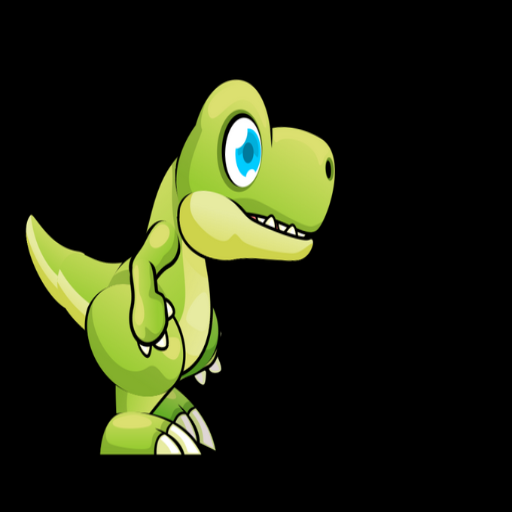

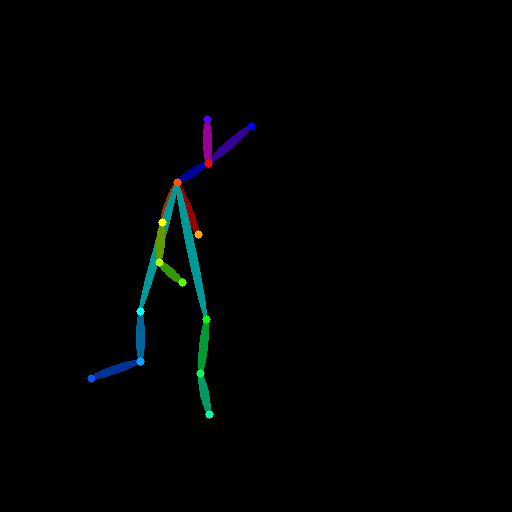

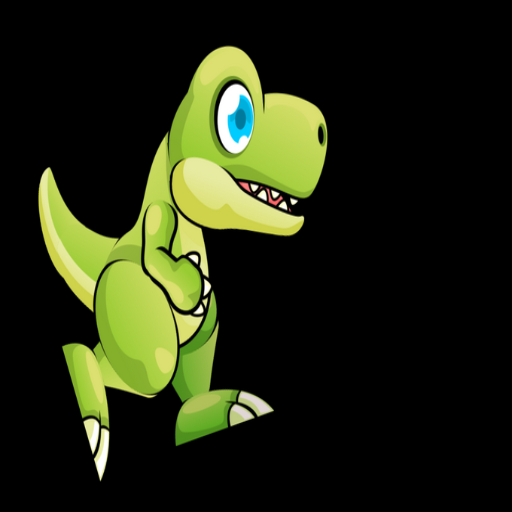

Reference: Test/in_sample/cute_dino/motions/Run/ground_truth/frame_1.png, Pose: Test/in_sample/cute_dino/motions/Run/poses/humanpose_4.png, Target: Test/in_sample/cute_dino/motions/Run/ground_truth/frame_4.png
Sample 2:


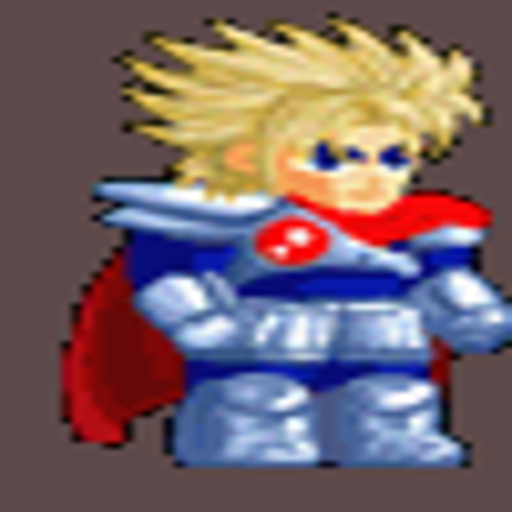

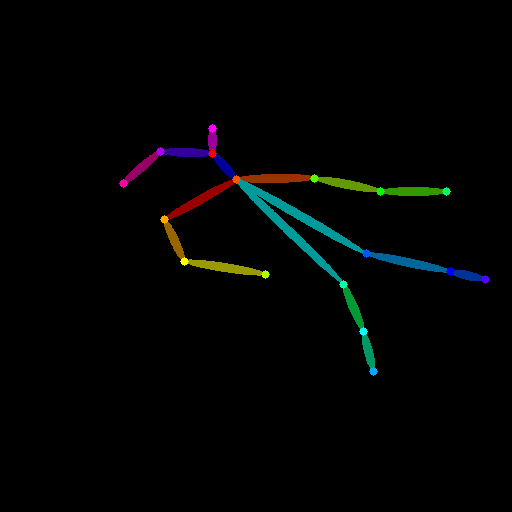

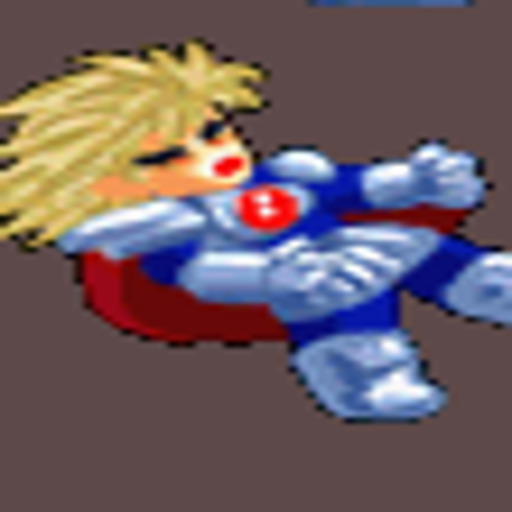

Reference: Test/in_sample/Louis_hand/motions/die/reference.png, Pose: Test/in_sample/Louis_hand/motions/die/poses/humanpose_1.png, Target: Test/in_sample/Louis_hand/motions/die/ground_truth/frame_1.png
Sample 3:


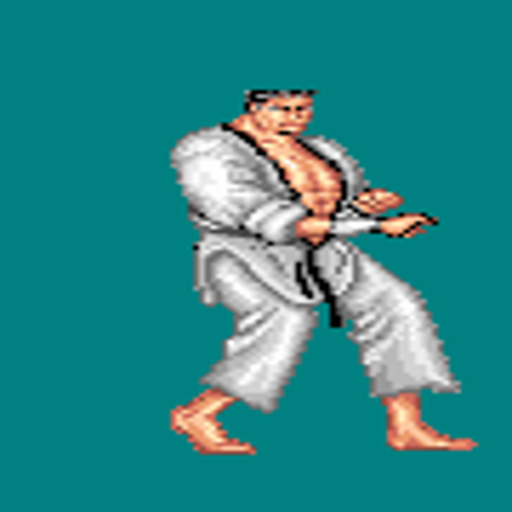

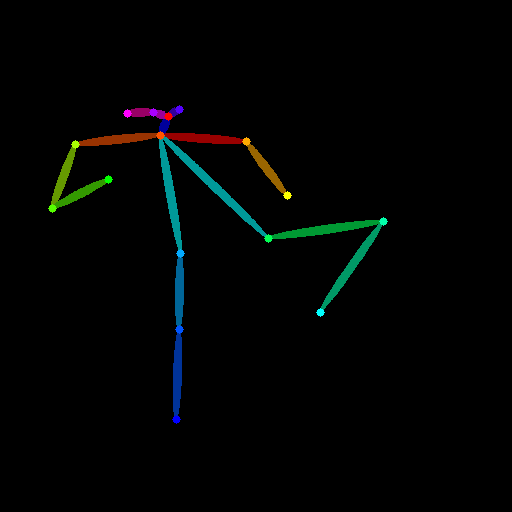

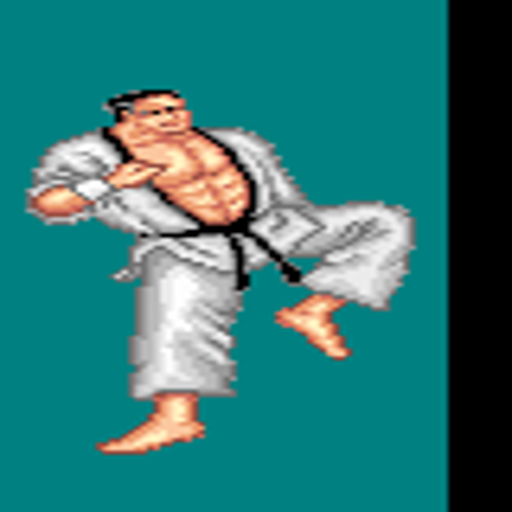

Reference: Test/in_sample/Jaan/motions/highkick/reference.png, Pose: Test/in_sample/Jaan/motions/highkick/poses/humanpose_2.png, Target: Test/in_sample/Jaan/motions/highkick/ground_truth/frame_2.png
Sample 4:


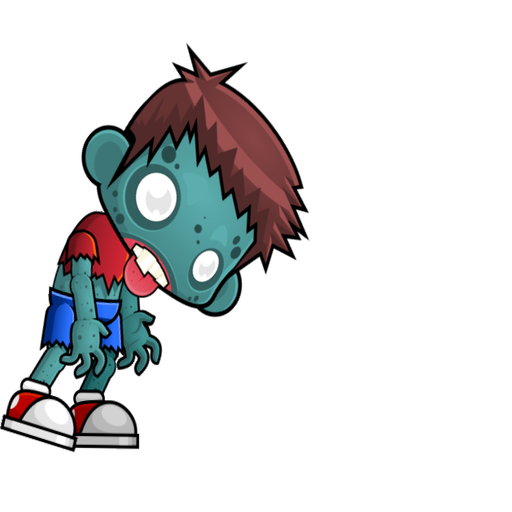

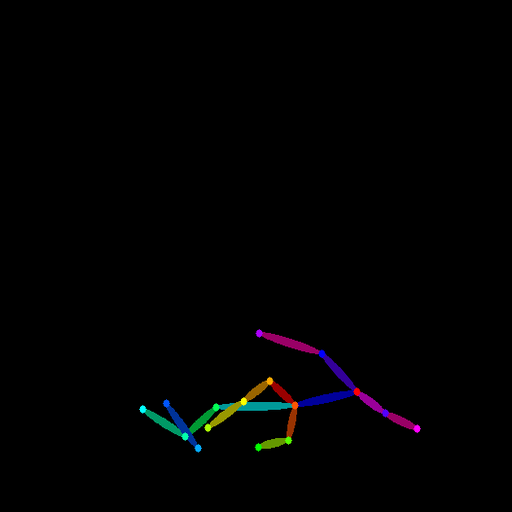

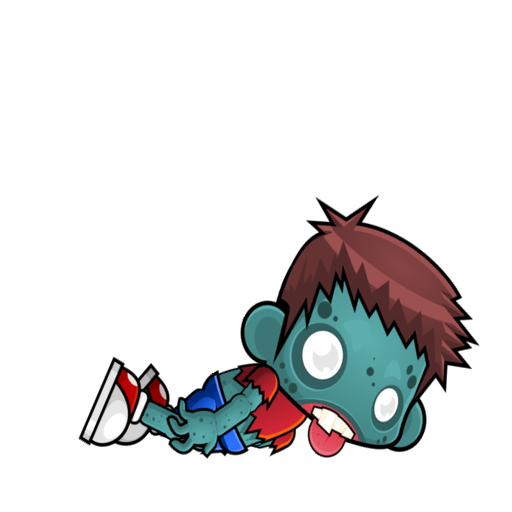

Reference: Test/in_sample/zombie_finished/motions/Dead/ground_truth/frame_1.png, Pose: Test/in_sample/zombie_finished/motions/Dead/poses/humanpose_11.png, Target: Test/in_sample/zombie_finished/motions/Dead/ground_truth/frame_11.png
Sample 5:


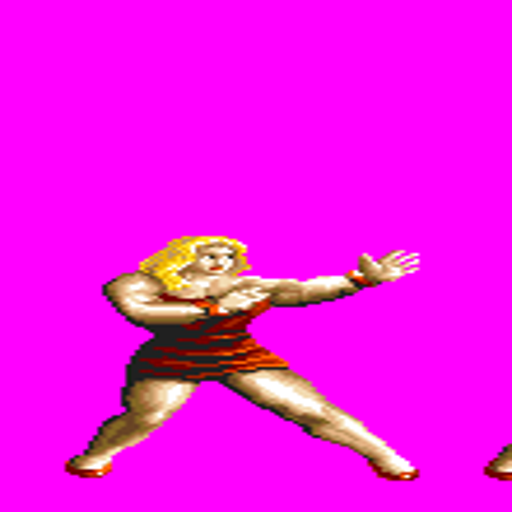

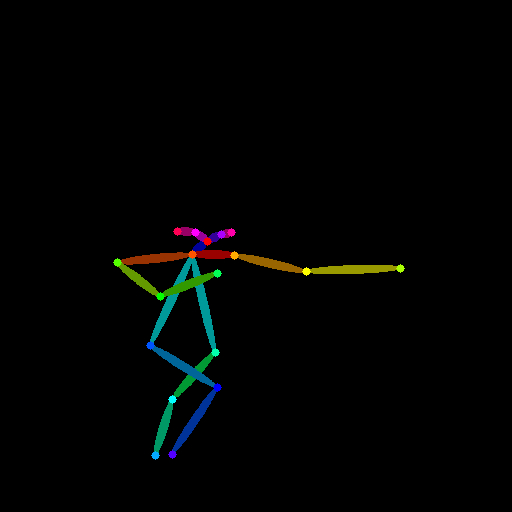

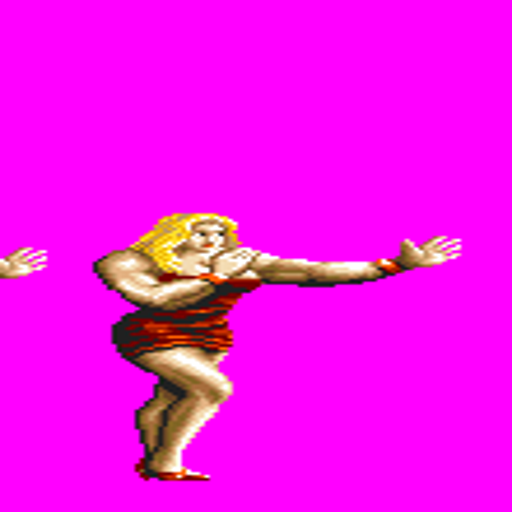

Reference: Test/in_sample/Binran/motions/push/ground_truth/frame_0.png, Pose: Test/in_sample/Binran/motions/push/poses/humanpose_2.png, Target: Test/in_sample/Binran/motions/push/ground_truth/frame_2.png

Displaying samples from test_out_sample_data.json
Sample 1:


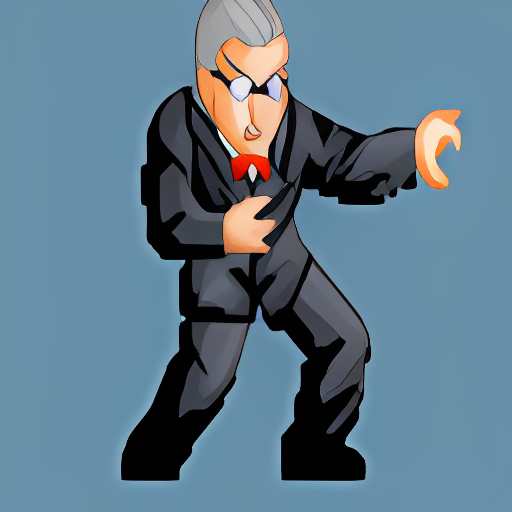

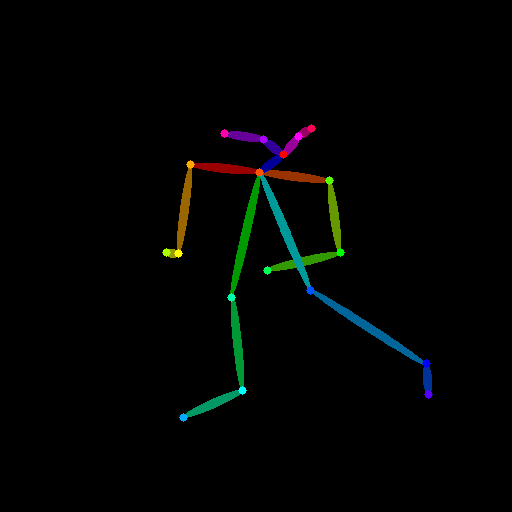

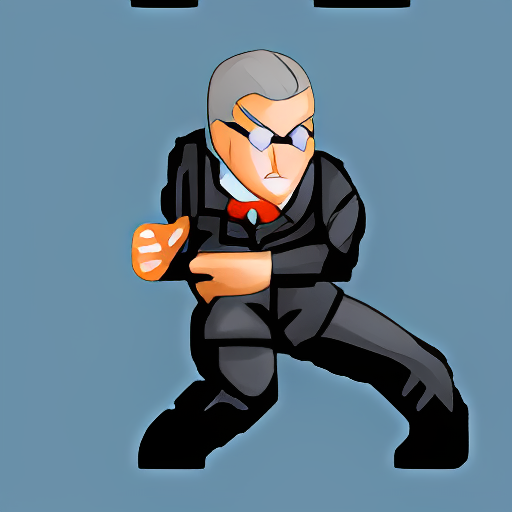

Reference: Test/out_sample/Enemies  Miscellaeous/motions/attack/reference.png, Pose: Test/out_sample/Enemies  Miscellaeous/motions/attack/poses/humanpose_0.png, Target: Test/out_sample/Enemies  Miscellaeous/motions/attack/ground_truth/frame_0.png
Sample 2:


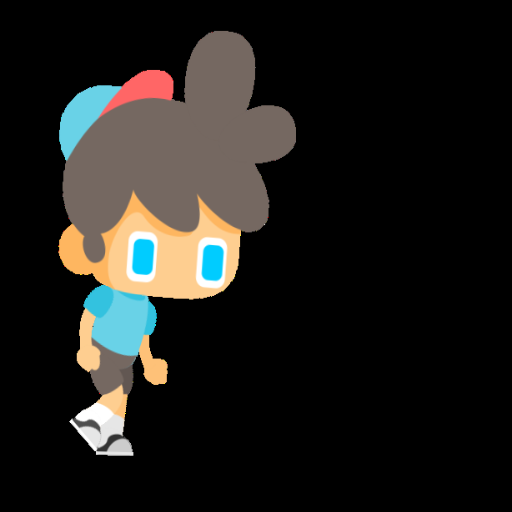

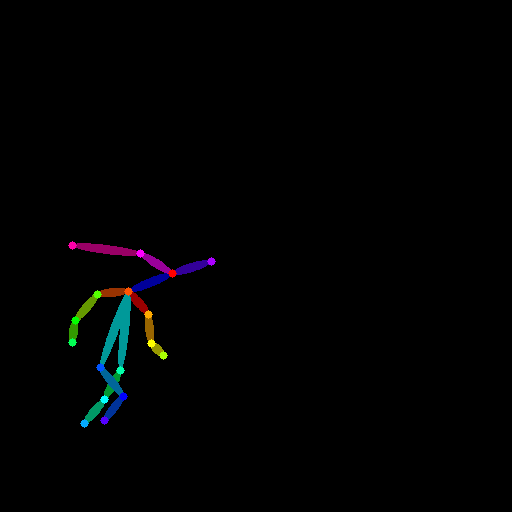

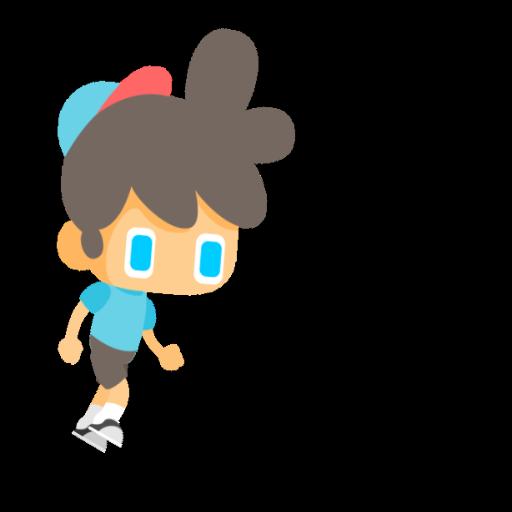

Reference: Test/out_sample/the_boy/motions/Run/ground_truth/frame_1.png, Pose: Test/out_sample/the_boy/motions/Run/poses/humanpose_2.png, Target: Test/out_sample/the_boy/motions/Run/ground_truth/frame_2.png
Sample 3:


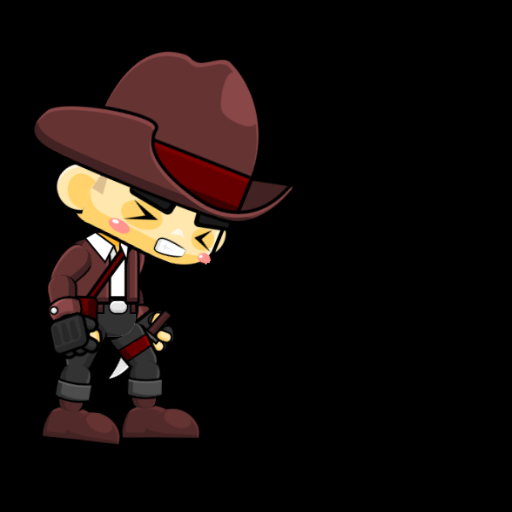

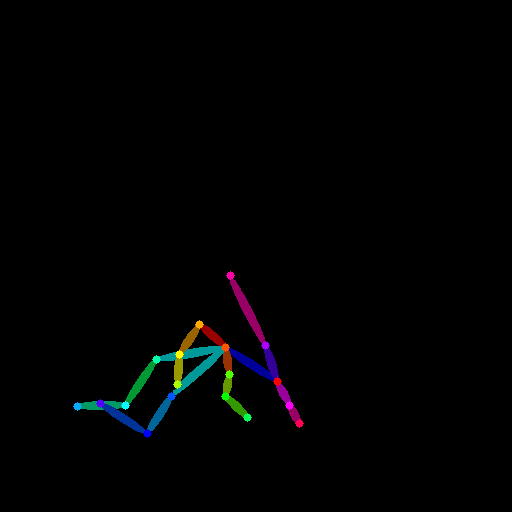

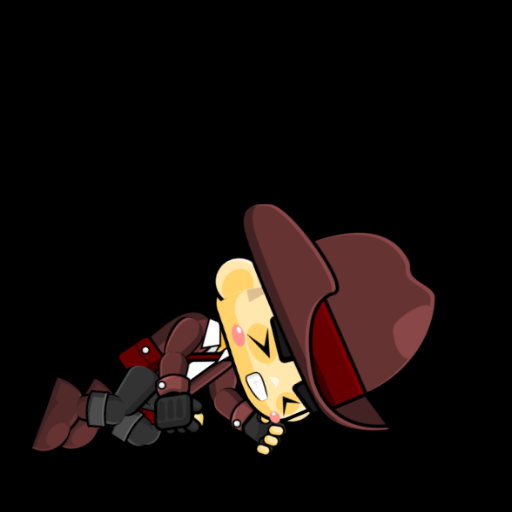

Reference: Test/out_sample/templerun/motions/dead/ground_truth/frame_1.png, Pose: Test/out_sample/templerun/motions/dead/poses/humanpose_5.png, Target: Test/out_sample/templerun/motions/dead/ground_truth/frame_5.png
Sample 4:


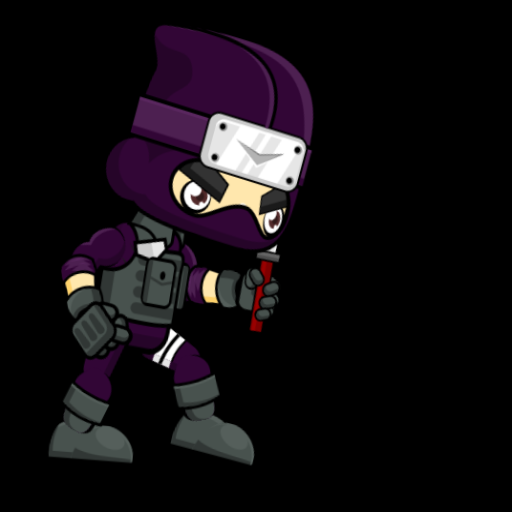

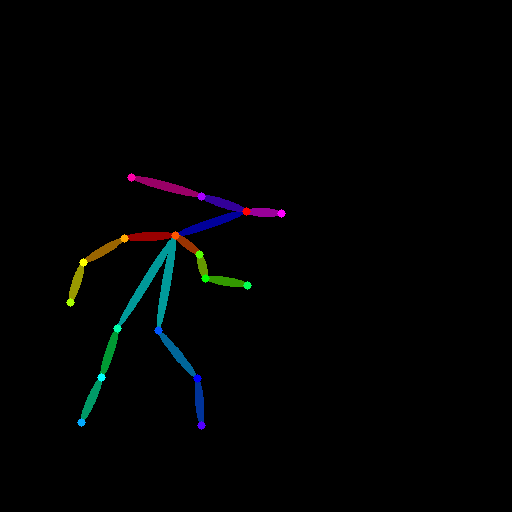

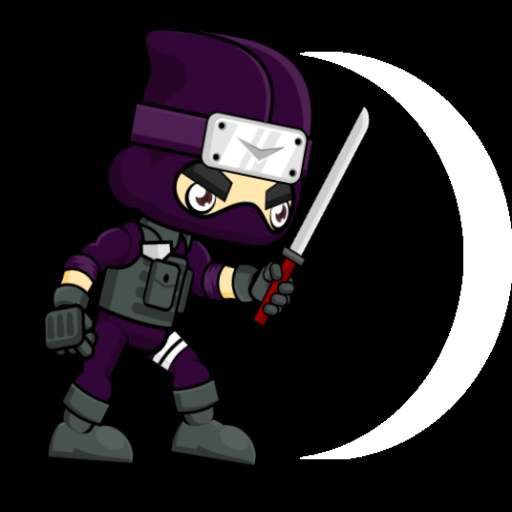

Reference: Test/out_sample/ninjaadventurenew/motions/attack/ground_truth/frame_1.png, Pose: Test/out_sample/ninjaadventurenew/motions/attack/poses/humanpose_2.png, Target: Test/out_sample/ninjaadventurenew/motions/attack/ground_truth/frame_2.png
Sample 5:


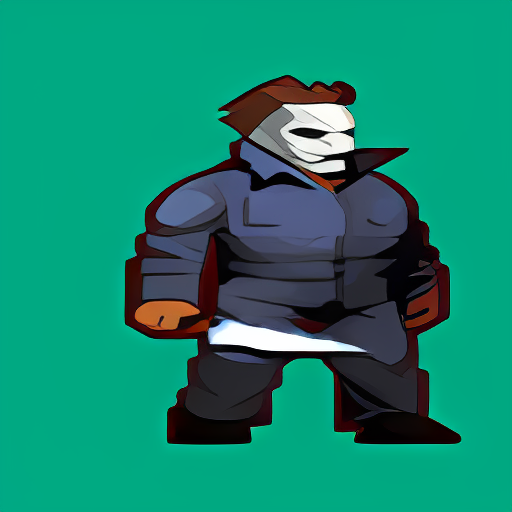

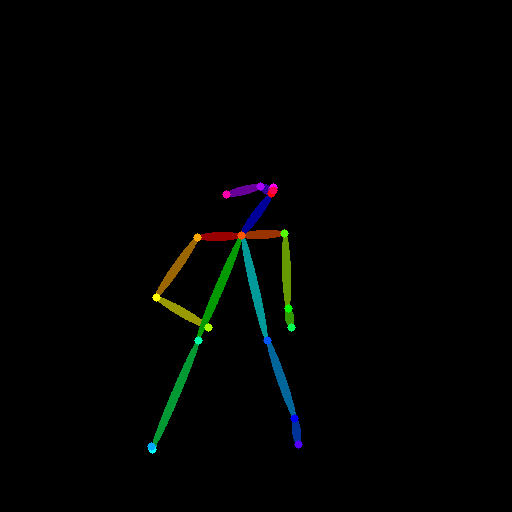

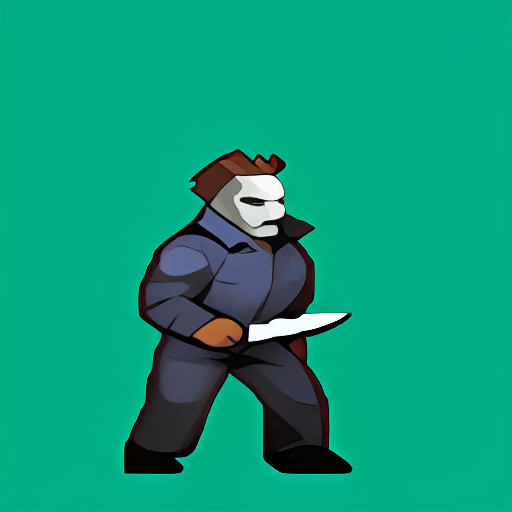

Reference: Test/out_sample/Michael Myers/motions/attack/reference.png, Pose: Test/out_sample/Michael Myers/motions/attack/poses/humanpose_4.png, Target: Test/out_sample/Michael Myers/motions/attack/ground_truth/frame_4.png


In [2]:
import random
from PIL import Image
import os
import json

def display_sample_data(json_path, root_dir, sample_size=5):
    # Load the data.json file
    with open(json_path, "r") as f:
        data = json.load(f)
    
    # Randomly sample `sample_size` data points
    sample_data = random.sample(data, min(sample_size, len(data)))

    # Display the reference, pose, and target images for each sampled data point
    for idx, sample in enumerate(sample_data):
        print(f"Sample {idx + 1}:")
        try:
            # Load and display reference image
            reference_image_path = os.path.join(root_dir, sample["reference_image"])
            reference_image = Image.open(reference_image_path)
            reference_image.show(title=f"Reference Image {idx + 1}")

            # Load and display pose image
            pose_image_path = os.path.join(root_dir, sample["pose_image"])
            pose_image = Image.open(pose_image_path)
            pose_image.show(title=f"Pose Image {idx + 1}")

            # Load and display target image
            target_image_path = os.path.join(root_dir, sample["target_image"])
            target_image = Image.open(target_image_path)
            target_image.show(title=f"Target Image {idx + 1}")

            print(f"Reference: {sample['reference_image']}, Pose: {sample['pose_image']}, Target: {sample['target_image']}")
        except Exception as e:
            print(f"Error loading images for Sample {idx + 1}: {e}")

# Paths
in_sample_json_path = "/home/ubuntu/IP-Adapter/data/test_in_sample_data.json"
out_sample_json_path = "/home/ubuntu/IP-Adapter/data/test_out_sample_data.json"
root_directory = "/home/ubuntu/IP-Adapter/data"

# Display 5 samples from test_in_sample_data.json
print("Displaying samples from test_in_sample_data.json")
display_sample_data(in_sample_json_path, root_directory, sample_size=5)

# Display 5 samples from test_out_sample_data.json
print("\nDisplaying samples from test_out_sample_data.json")
display_sample_data(out_sample_json_path, root_directory, sample_size=5)
